In [13]:
from model import DexiNed
from train import BIPEDv2

import torch
device = torch.device('cpu')
device = torch.device('cuda') if torch.cuda.is_available() else device # for nvidia cuda
device = torch.device('mps') if torch.backends.mps.is_available() else device # for apple selicon

checkpoint_path = "./checkpoints/cpt_e30_lr4.pth"
log_path = "./checkpoints/cpt_e30_lr4_log.json"

In [14]:
# load model
model = DexiNed()
model.load_state_dict(torch.load(checkpoint_path, weights_only=True))

<All keys matched successfully>

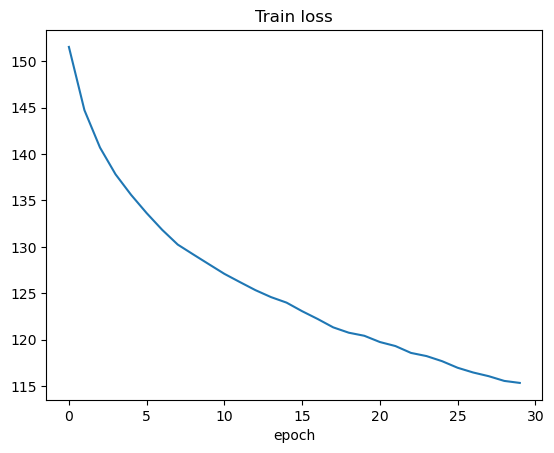

In [15]:
import json
import matplotlib.pyplot as plt

with open(log_path, 'r') as f:
    logs = json.load(f)

plt.plot(logs['train_loss'])
plt.title("Train loss")
plt.xlabel("epoch")
plt.show()

In [16]:
# load test data
dataset = BIPEDv2(
    "./BIPEDv2/BIPED/edges/imgs/test/rgbr",
    "./BIPEDv2/BIPED/edges/edge_maps/test/rgbr"
)

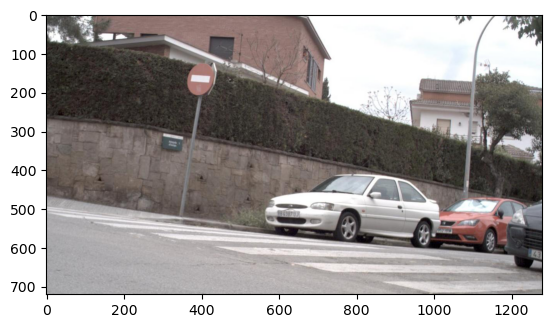

In [17]:
# take one example
x, y = dataset[4]
plt.imshow(x.permute(1,2,0))
plt.show()

In [18]:
# inference
model.eval()
with torch.no_grad():
    model.to(device)
    yhat = model(x.unsqueeze(0).to(device))[-1].squeeze()
    yhat = yhat.to('cpu')
yhat = torch.where(yhat<0, 0, yhat)
yhat = torch.where(yhat>1, 1, yhat)

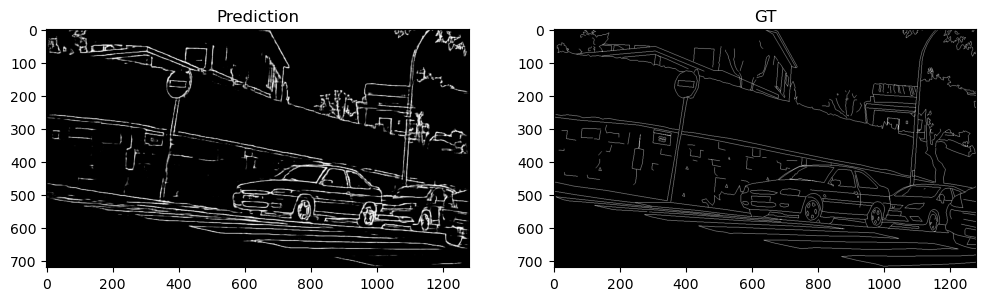

In [19]:
# display result
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
# fig.suptitle(img_index)
ax1.imshow(yhat, cmap="gray")
ax1.set_title("Prediction")
ax2.imshow(y, cmap="gray")
ax2.set_title("GT")
plt.show()